# Tutorial on wavelets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../src")
import DWT

In [31]:
g = DWT.get_scaling('Haar')
h = DWT.get_wavelet(g)

In [32]:
A1 = DWT.compute_AB(g, 1, 16)
A2 = DWT.compute_AB(g, 2, 16)
A3 = DWT.compute_AB(g, 3, 16)
A4 = DWT.compute_AB(g, 4, 16)
B1 = DWT.compute_AB(h, 1, 16)
B2 = DWT.compute_AB(h, 2, 16)
B3 = DWT.compute_AB(h, 3, 16)
B4 = DWT.compute_AB(h, 4, 16)

In [33]:
Wcal1 = B1
Wcal2 = np.matmul(B2, A1)
Wcal3 = np.matmul(np.matmul(B3, A2), A1)
Wcal4 = np.matmul(np.matmul(np.matmul(B4, A3), A2), A1)
Vcal4 = np.matmul(np.matmul(np.matmul(A4, A3), A2), A1)
Wcal = np.concatenate((Wcal1, Wcal2, Wcal3, Wcal4, Vcal4), axis=0)

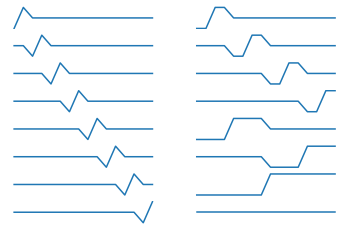

In [59]:
fig1 = plt.figure(facecolor='white')
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 0))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.plot(np.arange(0, 16), Wcal[i,:])
for i in range(0, 8):
    ax1 = plt.subplot2grid((8, 2), (i, 1))
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.plot(np.arange(0, 16), Wcal[8 + i,:])

In [27]:
X = np.loadtxt('../data/ts16a.dat')

In [50]:
W = DWT.pyramid(X, 'Haar', 4)

In [51]:
W

array([-0.42426407,  0.07071068,  0.28284271,  0.6363961 ,  0.21213203,
        0.14142136,  0.14142136,  0.21213203, -0.45      ,  0.15      ,
        0.05      , -0.65      , -0.28284271,  0.70710678,  1.3       ,
       -0.4       ])

In [52]:
np.matmul(Wcal, X)

array([-0.42426407,  0.07071068,  0.28284271,  0.6363961 ,  0.21213203,
        0.14142136,  0.14142136,  0.21213203, -0.45      ,  0.15      ,
        0.05      , -0.65      , -0.28284271,  0.70710678,  1.3       ,
       -0.4       ])

In [53]:
X

array([ 0.2, -0.4, -0.6, -0.5, -0.8, -0.4, -0.9,  0. , -0.2,  0.1, -0.1,
        0.1,  0.7,  0.9,  0. ,  0.3])

In [54]:
np.matmul(np.transpose(Wcal), W)

array([ 2.00000000e-01, -4.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -8.00000000e-01, -4.00000000e-01, -9.00000000e-01,  3.33066907e-16,
       -2.00000000e-01,  1.00000000e-01, -1.00000000e-01,  1.00000000e-01,
        7.00000000e-01,  9.00000000e-01, -1.11022302e-16,  3.00000000e-01])